# Part I - (Airline On-Time Performance )
## by (Aniekan Inyang)

### Background Information on the  Airline On-Time Performance Data

This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, covering a 5 years period of daily data from 2004 to 2008.



Starting from univariate visualizations, moving through bivariate visualizations, and finally multivariate visualizations.

The dataset consists of 31254220,  rows and 29 columns:

Variable descriptions: 
- 1 Year: 2004-2008 

- 2 Month: 1-12 

- 3 DayofMonth: 1-31 

- 4 DayOfWeek: 1 (Monday) - 7 (Sunday) 
- 5 DepTime:  actual departure time (local, hhm m) 
- 6 CRSDepTime: scheduled departure time (local, hhmm) 
- 7 ArrTime: actual arrival time (local, hhmm) 
- 8 CRSArrTime: scheduled arrival time (local, hhmm) 
- 9 UniqueCarrier: unique carrier code 
- 10 FlightNum: flight number 
- 11 TailNum: plane tail number 
- 12 ActualElapsedTime: in minutes 
- 13 CRSElapsedTime: in minutes 
- 14 AirTime: in minutes 
- 15 ArrDelay: arrival delay, in minutes 
- 16 DepDelay: departure delay, in minutes 
- 17 Origin: origin IATA airport code 
- 18 Dest: destination IATA airport code 
- 19 Distance: in miles 
- 20 TaxiIn: taxi in time, in minutes 
- 21 TaxiOut: taxi out time in minutes 
- 22 Cancelled: was the flight cancelled? 
- 23 CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
- 24 Diverted: 1 = yes, 0 = no 
- 25 CarrierDelay: in minutes 
- 26 WeatherDelay: in minutes 
- 27 NASDelay: in minutes 
- 28 SecurityDelay: in minutes 
- 29 LateAircraftDelay: in minutes

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from functools import reduce

%matplotlib inline

In [2]:
# loading datasets and combing it to a single dataframe
join_flight_df=[] #Initializing dataframes list
for file in glob.glob("*.csv"):    
    df = pd.read_csv(file, encoding='latin-1')    
    join_flight_df.append(df)
    
flights_df = pd.concat(join_flight_df, ignore_index=True)

# Data Cleaning

In this section, I will go through assessing the dataset looking for both quality and tidiness issues. 


### Visually and Programmatically Inspect the Dataset

In [3]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [4]:
flights_df.shape

(31254220, 29)

In [5]:
# Dataset information
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31254220 entries, 0 to 31254219
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay    

#### DEFINE

Check for duplicate value

#### CODE

In [6]:
# check for duplicated value
flights_df.duplicated().sum()

59

#### Solution

In [7]:
flights_df.drop_duplicates(inplace=True)

#### Test

In [8]:
flights_df.duplicated().sum()

0

#### DEFINE

Change column names to more readable and callable format

#### CODE

In [9]:
#renaming the column names
flights_df.rename(columns={'Year':'year', 'Month': 'month', 'DayofMonth':'day_of_month','DayOfWeek':'day_of_week',
                           'DepTime':'departure_time', 'CRSDepTime':'crs_dep_time','ArrTime':'arrival_time', 'CRSArrTime':'crs_arrival_time',
                           'UniqueCarrier':'unique_carrier','FlightNum':'flight_num', 'TailNum':'tail_num','ActualElapsedTime':'actual_elapsed_time',
                           'CRSElapsedTime':'crs_elapsed_time', 'AirTime':'air_time', 'ArrDelay':'arrival_delay','DepDelay':'departure_delay',
                           'Origin':'origin', 'Dest':'destination', 'Distance':'distance','TaxiIn':'taxi_in', 'TaxiOut':'taxi_out',
                           'Cancelled':'cancelled', 'CancellationCode':'cancellation_code','Diverted':'diverted', 'CarrierDelay':'carrier_delay',
                           'WeatherDelay':'weather_delay','NASDelay':'nas_delay', 'SecurityDelay':'security_delay', 'LateAircraftDelay':'late_aircraft_delay'},inplace=True)

#### Test

In [10]:
flights_df.columns

Index(['year', 'month', 'day_of_month', 'day_of_week', 'departure_time',
       'crs_dep_time', 'arrival_time', 'crs_arrival_time', 'unique_carrier',
       'flight_num', 'tail_num', 'actual_elapsed_time', 'crs_elapsed_time',
       'air_time', 'arrival_delay', 'departure_delay', 'origin', 'destination',
       'distance', 'taxi_in', 'taxi_out', 'cancelled', 'cancellation_code',
       'diverted', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

### What is the structure of your dataset?

There are 31,254,220 rows and 29 columns in the dataset (year, month, day_of_month, day_of_week, departure_time, crs_dep_time, arrival_time, crs_arrival_time, unique_carrier, flight_num, tail_num, actual_elapsed_time, crs_elapsed_time, air_time, arrival_delay, departure_delay, origin, destination, distance, taxi_in, taxi_out, cancelled, cancellation_code, diverted, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay). Most variables are numeric.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in factors that are responsible for causing delays and cancellations over the 5 years period of study, with a look at certain destinations or origins that are home to delays.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features of interest are factors that are attributed to delays with arrival and departure, cancellation codes, and reasons.

## Univariate Exploration

Let's begin with our main point of interest, arrival and departure delays, cancellation causes distribution.

In [11]:
# color scheme for seaborn charts going forward
sns.set_style('darkgrid') # set grid color
sns.set_palette('Set1') # set color palette
color = sns.color_palette()[1]

In [12]:
def delay_hist(delay_type):
    ''' This function plots the delays distribution histogram based on passed delay type'''
    plt.figure(figsize=(8, 8))
    binsize = 5
    start = flights_df[delay_type].min()
    stop = flights_df[delay_type].max()
    bins = np.arange(start,stop + 5,5)
    
    plt.hist(data = flights_df, x = delay_type,color=color, bins = bins)
    plt.xlim(-100,350)
    plt.xlabel(' {} (minutes)'.format(delay_type),fontsize=14)
    plt.show()

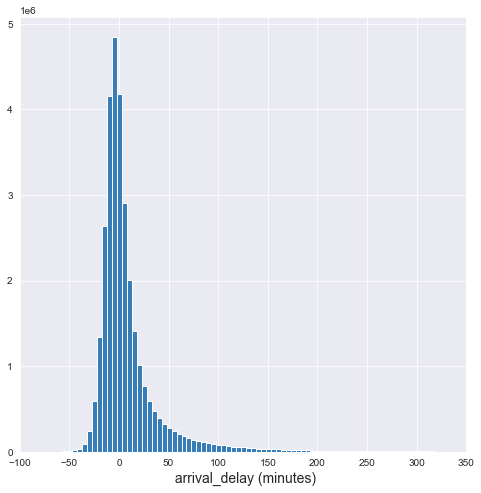

In [13]:
delay_hist('arrival_delay')

> As depicted by the histogram above, the dataset is dense between -50 and 50. A further investigation would be centered on arrival delay > 0. The overall distribution is unimodal and skewed to the right. In the next graph, we would be looking at the distribution of depature delay.

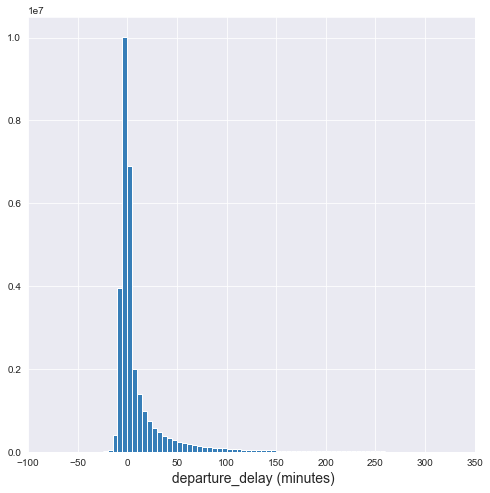

In [14]:
# checking distribution for departure delay
delay_hist('departure_delay')

> The appears to be a long tail in the distribution skewness to the right. The departure delay is highly dense between time 0 to 25 minutes. 

## Common cancellation reasons in the dataset

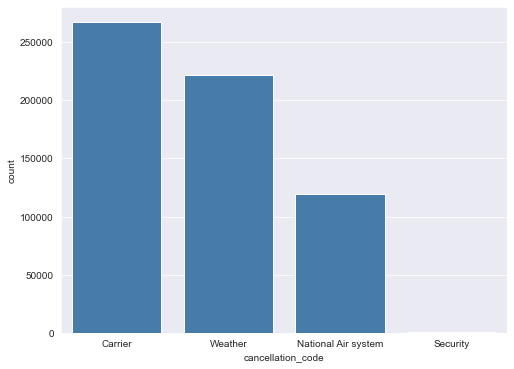

In [15]:
# common cancellation reasons plot 
plt.figure(figsize=[8,6])
base_color = sns.color_palette()[1]
r=sns.countplot(data= flights_df, x= 'cancellation_code', color= base_color,order = ['A','B','C','D']);
r.set_xticklabels(['Carrier','Weather','National Air system','Security']);

> The [cancellation codes](https://www.transtats.bts.gov/FieldInfo.asp?Svryq_Qr5p=f2rpvsvr5%FDgur%FDern510%FDS14%FDPn0pryyn6v10&Svryq_gB2r=Pun4&Y11x72_gnoyr=Y_PNaPRYYNgVba&gnoyr_VQ=FGJ&flf_gnoyr_anzr=g_bagVZR_eRcbegVaT&fB5_Svryq_anzr=PNaPRYYNgVba_PbQR) from the above bar plot it is observed that most cancellation is due to **carrier**, followed by **weather**, with **security** being the least of all cancellation causes. let's further investigate the carrier with the most cancellations.



In [16]:
def cancellation_plot(arr,cal_code):
    ''' This plots the cancellation graphs with the provided arr as entity of interest, and cancellation code'''
    plt.figure(figsize=[10,8])
    color = sns.color_palette()[1]
    x = flights_df[arr][flights_df.cancellation_code == cal_code]
    sns.countplot(x = x, color = color, order= x.value_counts().index)
    plt.xlabel(arr)
    plt.show()

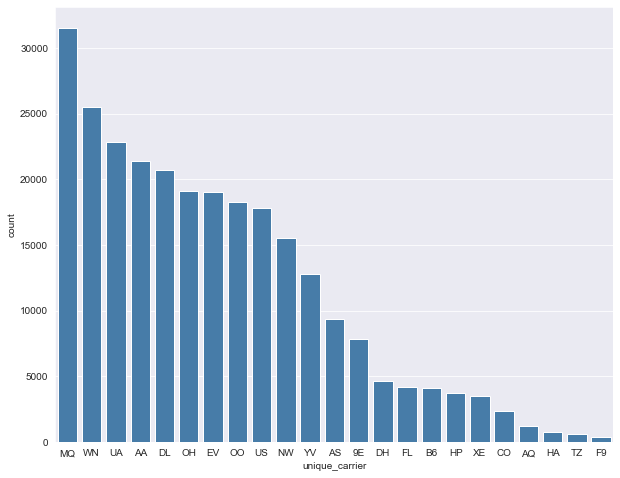

In [17]:
cancellation_plot('unique_carrier','A')

> As shown from the above bar graph, MQ(Envoy Air) to be highest carrier cancellations, followed by WN (Southwest Airlines), and UA (United Airlines, Inc)) which are the top three carriers with the highest cancellations. The least is f9 (Frontier Airlines, Inc.).

> Let's further dive down to the next highest cause of cancellation, **Weather**, associated with time. This prompts the need to investigate months of the years of study with the most cancellation.

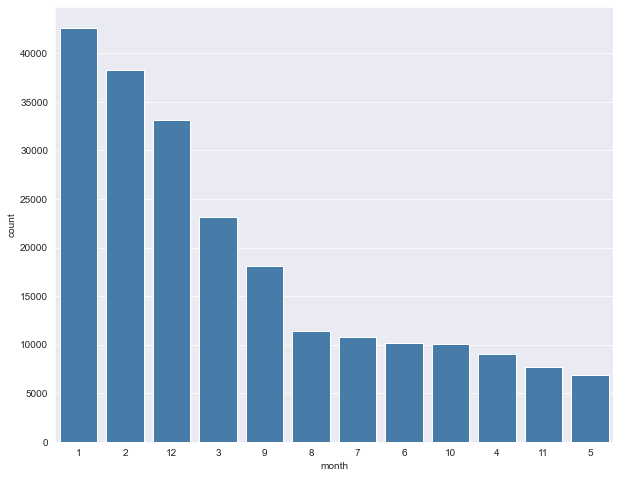

In [18]:
# weather cancellations by months
cancellation_plot('month','B')

> The first two months see the most cancellations, i.e January and February, followed by December being the third month with the most cancellation for the 5 years study period. We can explore this more in bivariate distributions where we can check relationships to other features and possibly fetch likable causes from the analysis of USA flight data.


>Let's check the yearly cancellation comprising the whole cancellation reasons.

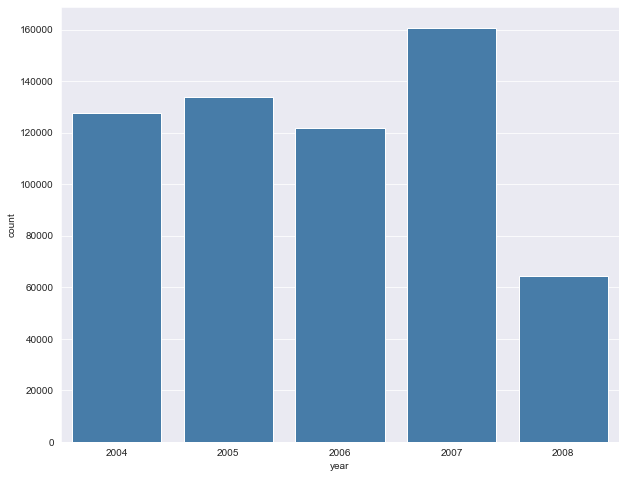

In [19]:
plt.figure(figsize=[10,8])
color = sns.color_palette()[1]
delay_codes = flights_df.loc[:,['year','month','cancellation_code']].query("cancellation_code in ['A','B','C','D']")
sns.countplot(data = delay_codes, x = 'year', color = color);
plt.xlabel('year');

### What is the frequency of cancellation from 2004 to 2008

In [20]:
delay_2004 = delay_codes.query('year == 2004')
delay_2005 = delay_codes.query('year == 2005')
delay_2006 = delay_codes.query('year == 2006')
delay_2007 = delay_codes.query('year == 2007')
delay_2008 = delay_codes.query('year == 2008');

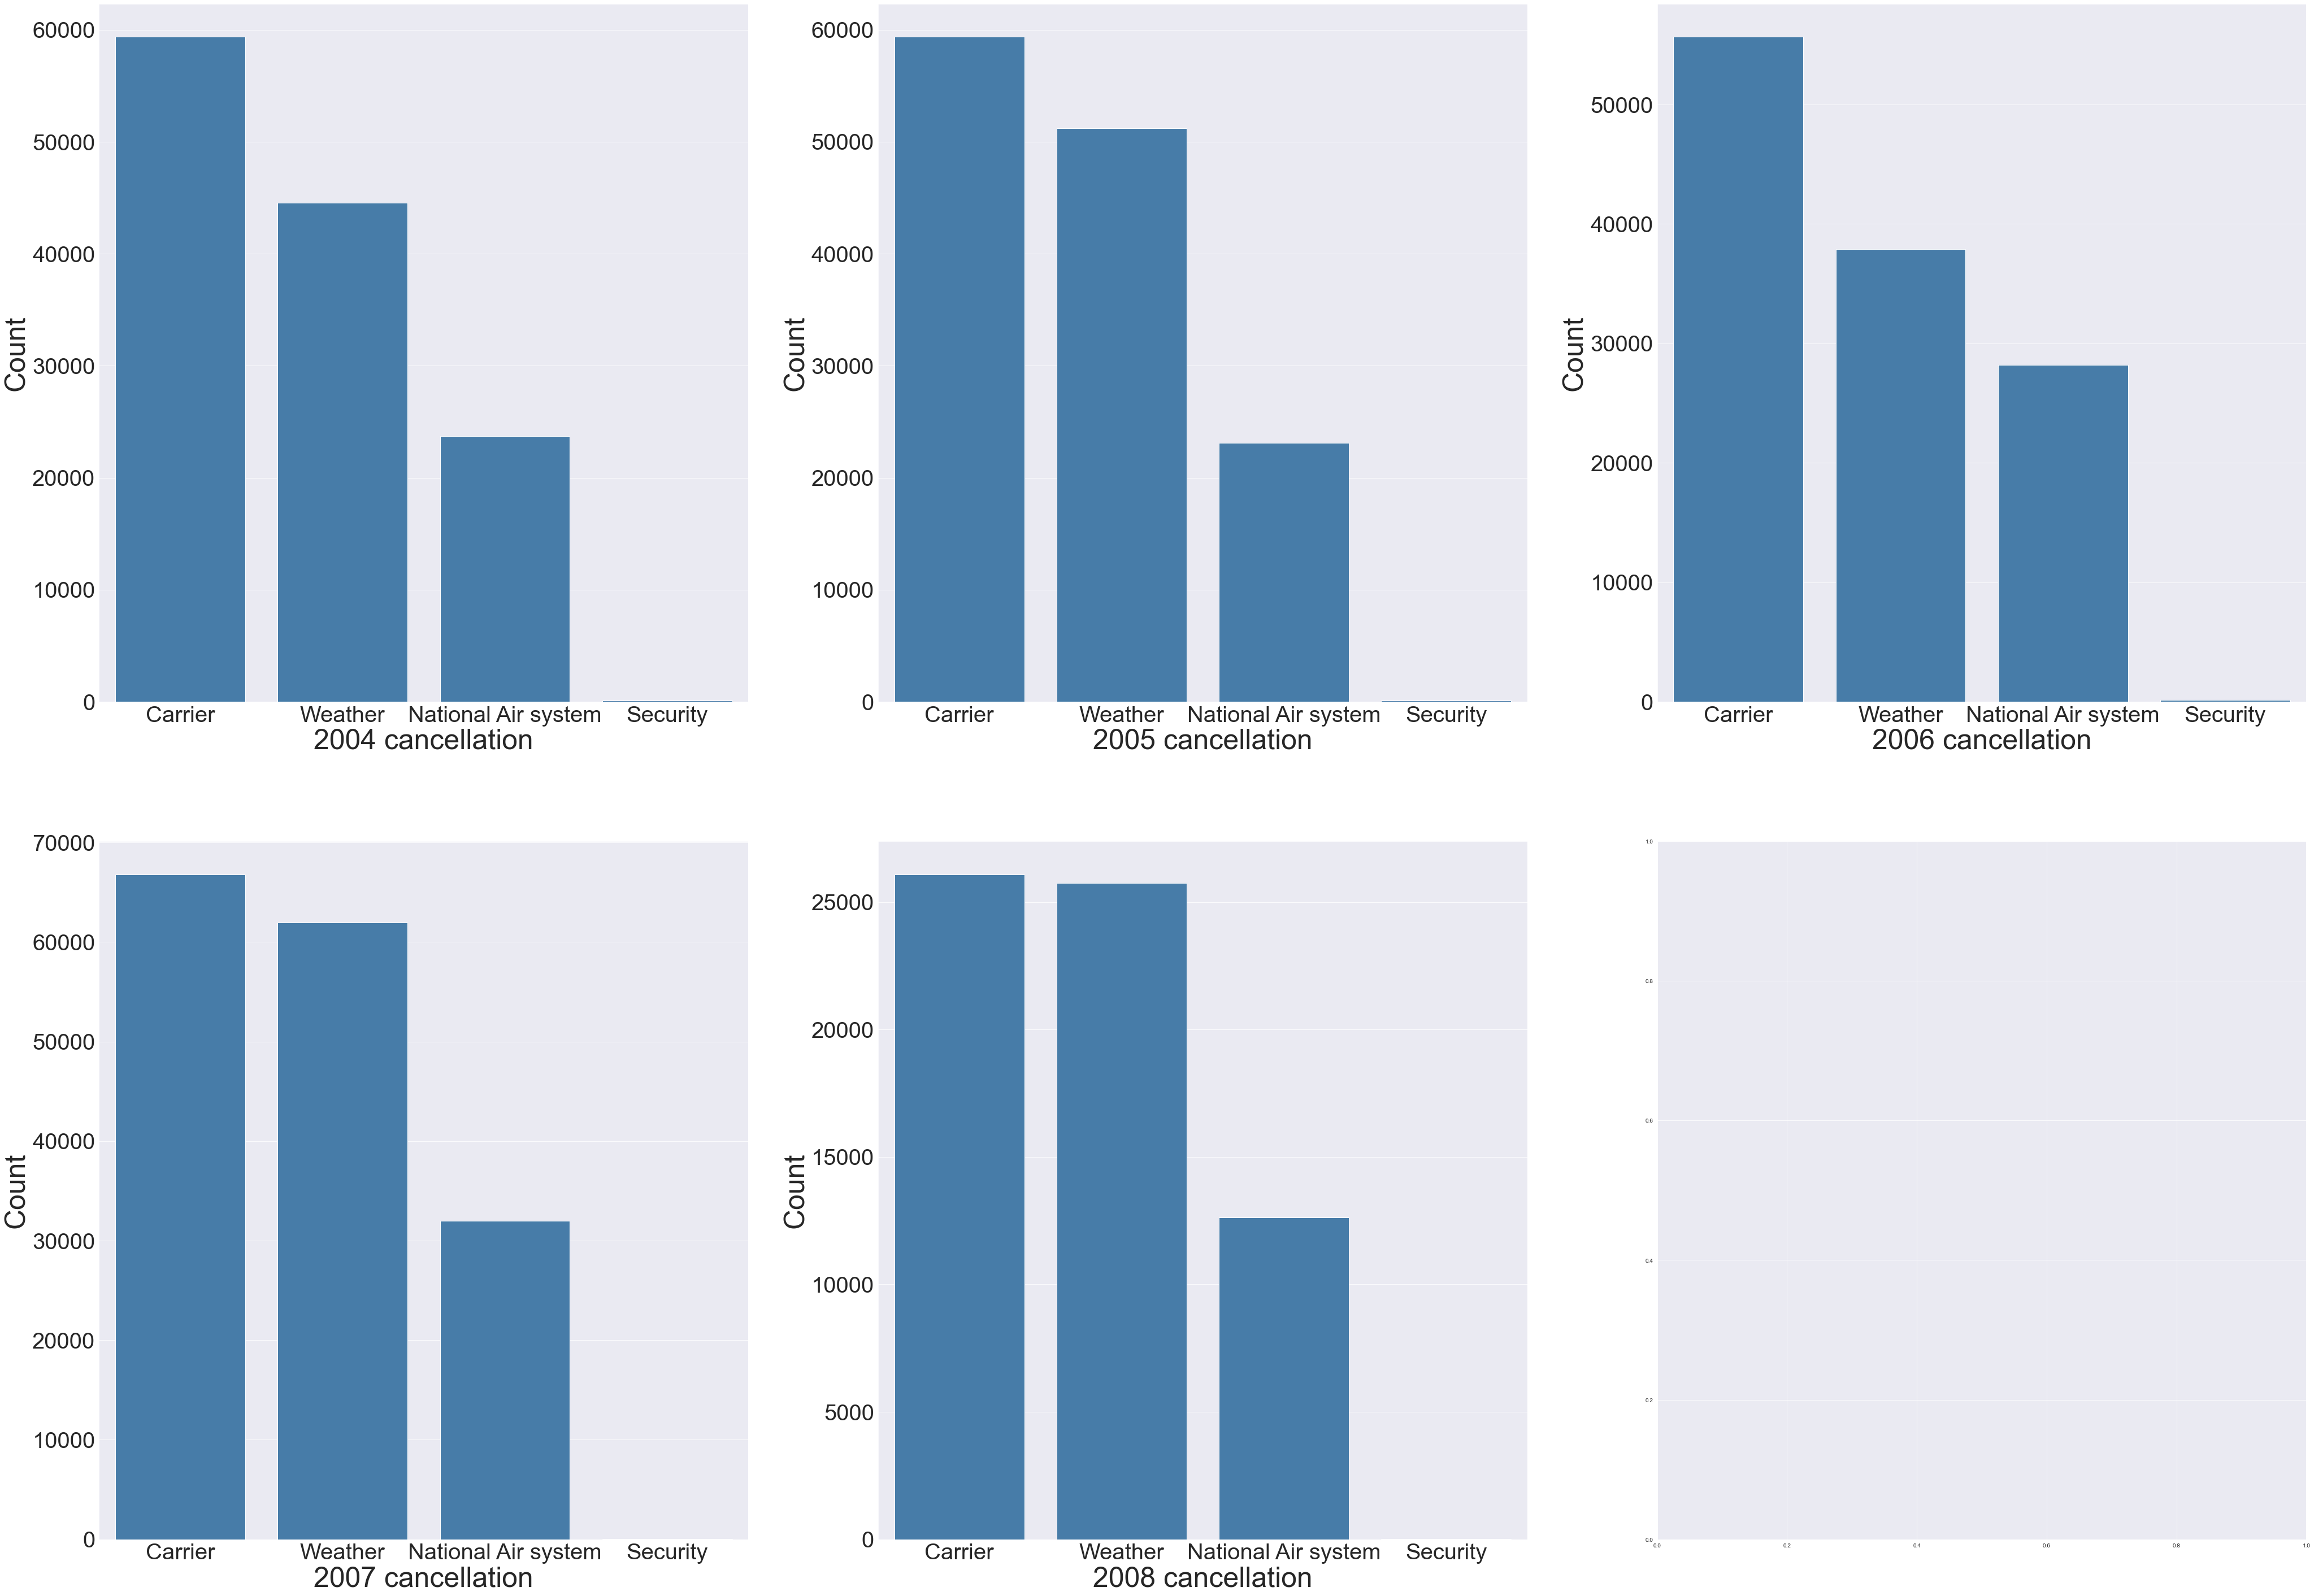

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(70,50))
color = sns.color_palette()[1]




plt.subplot(2, 3, 1)
q = sns.countplot(data = delay_2004, x = 'cancellation_code', color = color,order = ['A','B','C','D']);
q.set_xticklabels(['Carrier','Weather','National Air system','Security'], fontsize=40);
plt.yticks(fontsize=40);
plt.xlabel('2004 cancellation', fontsize=50);
plt.ylabel('Count', fontsize=50);


plt.subplot(2, 3, 2)
q = sns.countplot(data = delay_2005, x = 'cancellation_code', color = color,order = ['A','B','C','D']);
q.set_xticklabels(['Carrier','Weather','National Air system','Security'], fontsize=40);
plt.yticks(fontsize=40);
plt.xlabel('2005 cancellation', fontsize=50);
plt.ylabel('Count', fontsize=50);

plt.subplot(2, 3, 3)
q = sns.countplot(data=delay_2006, x='cancellation_code',   color = color,order = ['A','B','C','D']);
q.set_xticklabels(['Carrier','Weather','National Air system','Security'], fontsize=40);
plt.yticks(fontsize=40);
plt.xlabel('2006 cancellation', fontsize=50);
plt.ylabel('Count', fontsize=50);

plt.subplot(2, 3, 4)
q = sns.countplot(data=delay_2007, x='cancellation_code',  color = color,order = ['A','B','C','D'])
q.set_xticklabels(['Carrier','Weather','National Air system','Security'], fontsize=40);
plt.yticks(fontsize=40);
plt.xlabel('2007 cancellation', fontsize=50);
plt.ylabel('Count', fontsize=50);


plt.subplot(2, 3, 5)
q = sns.countplot(data=delay_2008, x='cancellation_code',  color = color,order = ['A','B','C','D'])
q.set_xticklabels(['Carrier','Weather','National Air system','Security'], fontsize=40);
plt.yticks(fontsize=40);
plt.xlabel('2008 cancellation', fontsize=50);
plt.ylabel('Count', fontsize=50);


>As observed from the plot above, it can be seen that carrier remains the highest cause of cancellation followed by weather from 2004 to 2008.
There was no major cause of cancellation due to security

Let's take a look at the origin and destination that are home to departure and delay respectively in the next lines of codes with a look at:

In [22]:
#filtering distination with departure delay greater than 0  
departure_delay_df = flights_df.loc[:,['year','month','destination','departure_delay','carrier_delay','weather_delay',
                                'nas_delay','security_delay','late_aircraft_delay']].query('departure_delay > 0')

#filtering origin with arrival delay greater than 0 
arrival_delay_df = flights_df.loc[:,['year','month','origin','arrival_delay','carrier_delay','weather_delay',
                                 'nas_delay','security_delay','late_aircraft_delay']].query('arrival_delay > 0')

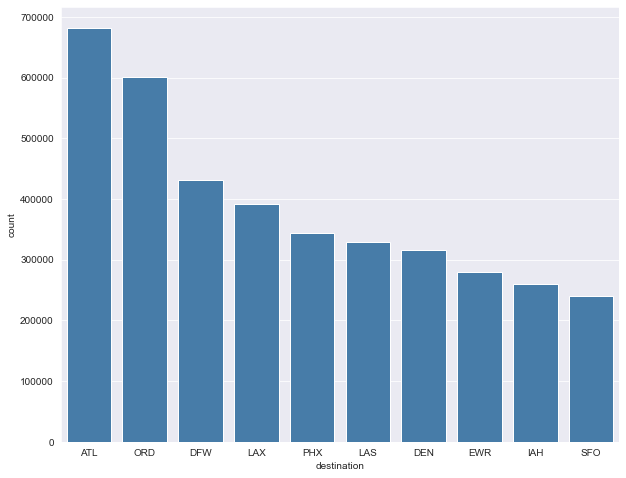

In [23]:
plt.figure(figsize=[10,8])
order = departure_delay_df['destination'].value_counts().iloc[:10].index
sns.countplot(data = departure_delay_df, x= 'destination', color = color, order = order);

> Limiting by 10 highest to avoid overplotting and have a better view of the destination with the highest departure delay. It can be observed, ATL (Atlanta, GA: Hartsfield-Jackson Atlanta International), ORD (Chicago, IL: Chicago O'Hare International), DFW (Dallas/Fort Worth, TX: Dallas/Fort Worth International), and LAX (Los Angeles, CA: Los Angeles International) are the highest four in the destinations with the departure delay.


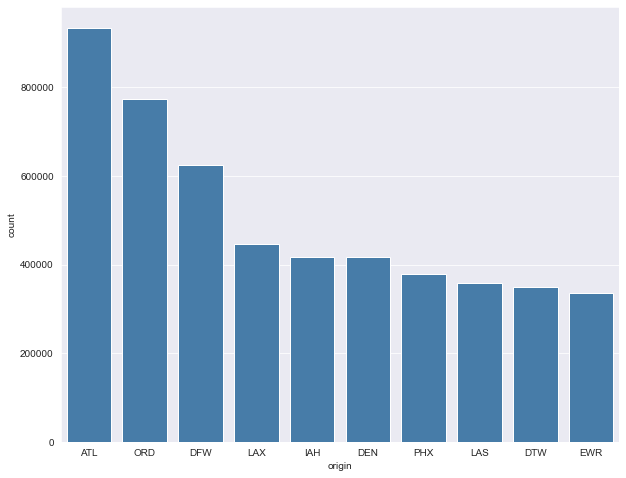

In [24]:
plt.figure(figsize=[10,8])
order = arrival_delay_df['origin'].value_counts().iloc[:10].index
sns.countplot(data = arrival_delay_df, x= 'origin', color = color, order = order);

> The illustration in the graph above drive the point of the previous graph of destination with departure delay. It's only logical to say that the departure delay from the origin caused the arrival delay at the destination. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The arrival delay distribution is dense between -50 and 50 minutes and appears to be unimodal and skewed to the right, similar to the distribution of arrival, which exhibits skewness to the right. The departure delay is highly dense between time 0 to 25 minutes.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Duplicate data where dropped and column names were renamed for easy referencing. Extraction was done for the cancellation code to obtain the major causes of cancellation provided by the datasets.

## Bivariate Exploration

> A continuation on areas of interest, factors causing cancellation, and delays. In this section we will investigate relationships between pairs of variables in our 5 years study data.

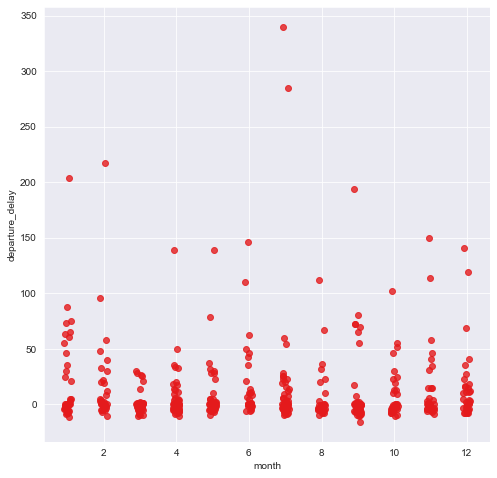

In [25]:
numeric_vars = ['departure_delay','arrival_delay','distance','month']
samples = np.random.choice(flights_df.shape[0], 500, replace = False)
flights_samp = flights_df.loc[samples,:]

plt.figure(figsize=[8,8])

sns.regplot(data=flights_samp, y = 'departure_delay', x='month',x_jitter = .1,y_jitter=.1, fit_reg=False)

plt.show()

From the graph above you can observe that there is no relationship between departure delay and month

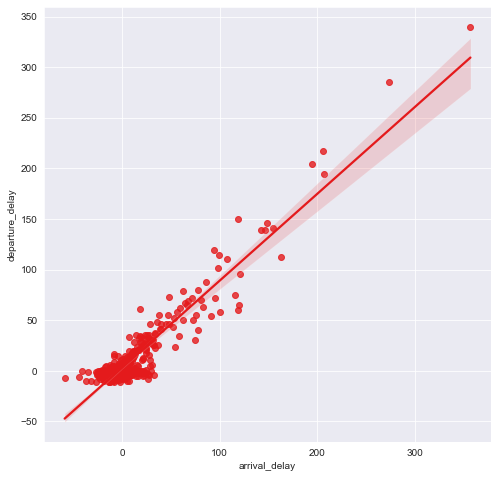

In [26]:
plt.figure(figsize=[8,8])

sns.regplot(data=flights_samp, y = 'departure_delay', x='arrival_delay',x_jitter = .1,y_jitter=.1)

plt.show()

From the graph above, we observe a positive relationship between departure delay and arrival delay, and its more densed between 0 and 50 for the relationship between departure delay and arrival delay

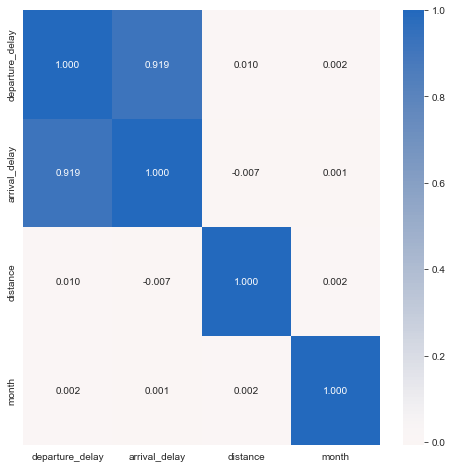

In [27]:
# Correlation plot

plt.figure(figsize = [8, 8])
sns.heatmap(flights_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()


>  There is a strong relationship of about 91% between arrival and departure delays. The other pairwise correlation between other features exhibits a weak positive or negative relationship as shown in the plots above.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There exist no other relationship aside from the main features, a small weak positive and negative correlation was observed between other features.

## Multivariate Exploration



Let's take a look at the origin and destination that are home to departure and arrival delay 

In [28]:
#filtering distination with departure delay greater than 0  
departure_delay_df = flights_df.loc[:,['year','month','destination','departure_delay','carrier_delay','weather_delay',
                                'nas_delay','security_delay','late_aircraft_delay']].query('departure_delay > 0')

#filtering origin with arrival delay greater than 0 
arrival_delay_df = flights_df.loc[:,['year','month','origin','arrival_delay','carrier_delay','weather_delay',
                                 'nas_delay','security_delay','late_aircraft_delay']].query('arrival_delay > 0')

In [29]:
departure_delay_df['destination'].value_counts().head(5)

ATL    682400
ORD    601399
DFW    431994
LAX    391361
PHX    344541
Name: destination, dtype: int64

In [30]:
arrival_delay_df['origin'].value_counts().head(5)

ATL    934957
ORD    774487
DFW    625725
LAX    446653
IAH    416332
Name: origin, dtype: int64

In [31]:
# Destination city dataset with departure delays greater than 0
destination_city_delay = departure_delay_df.query("destination in ['ATL','ORD','DFW','LAX','PHX']").groupby(
    'destination')[['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']].mean().reset_index()

# Arrival city dataset with departure delays greater than 0
arrival_city_delay = arrival_delay_df.query("origin in ['ATL','ORD','DFW','LAX','IAH']").groupby(
    'origin')[['carrier_delay','weather_delay',
                                'nas_delay','security_delay','late_aircraft_delay']].mean().reset_index()

In [32]:
destination_city_delay

,destination,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,ATL,9.748686,2.562208,14.414634,0.044629,9.257229
1,DFW,8.932903,2.579370,6.625888,0.050025,14.340271
2,LAX,8.219883,1.019649,4.476941,0.080816,10.218764
3,ORD,7.660831,1.394167,22.109752,0.038760,14.881637
4,PHX,7.544596,0.871723,3.555027,0.095776,8.989969


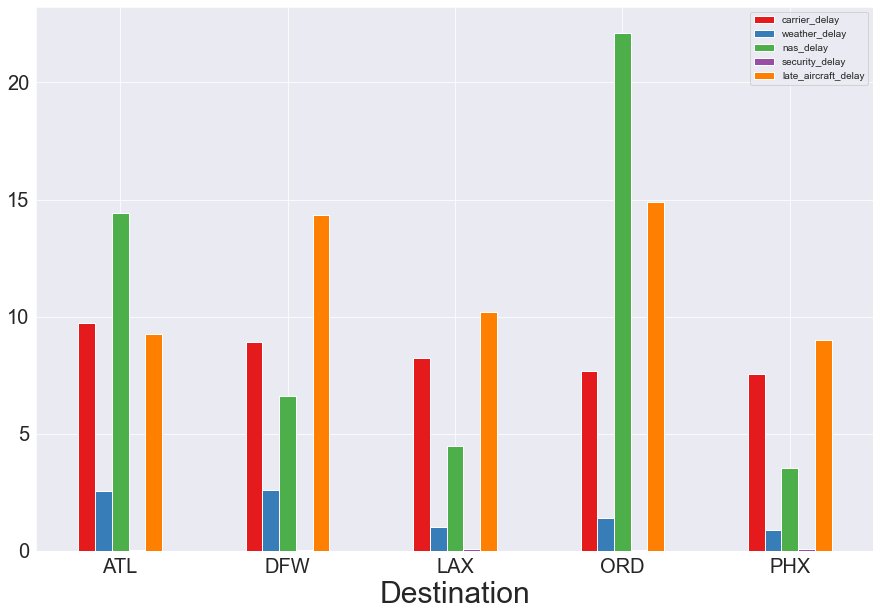

In [33]:
#plotting average delays with respect to destination cities. 
destination_city_delay.plot(kind='bar', x='destination', figsize=[15,10]);
plt.xticks(rotation=0,fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel('Destination', fontsize=30);

> Hartsfield-Jackson Atlanta International(ATL) experienced more departure delays as a result of National air systems, Dallas/Fort Worth International (DFW) and Los Angeles International (LAX), experienced more delays from late aircraft, Chicago O'Hare International (ORD) experienced more delays from the national air system. The least cause of delays in all cities is a delay due to security. 

In [34]:
arrival_city_delay

,origin,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,ATL,9.709218,2.830457,6.903157,0.021951,8.928852
1,DFW,8.310847,3.340786,7.238577,0.016004,9.189981
2,IAH,6.408280,2.302582,9.231306,0.150954,6.808079
3,LAX,7.439030,0.423969,4.968522,0.111385,7.711747
4,ORD,9.643189,2.017465,8.753377,0.012638,17.240450


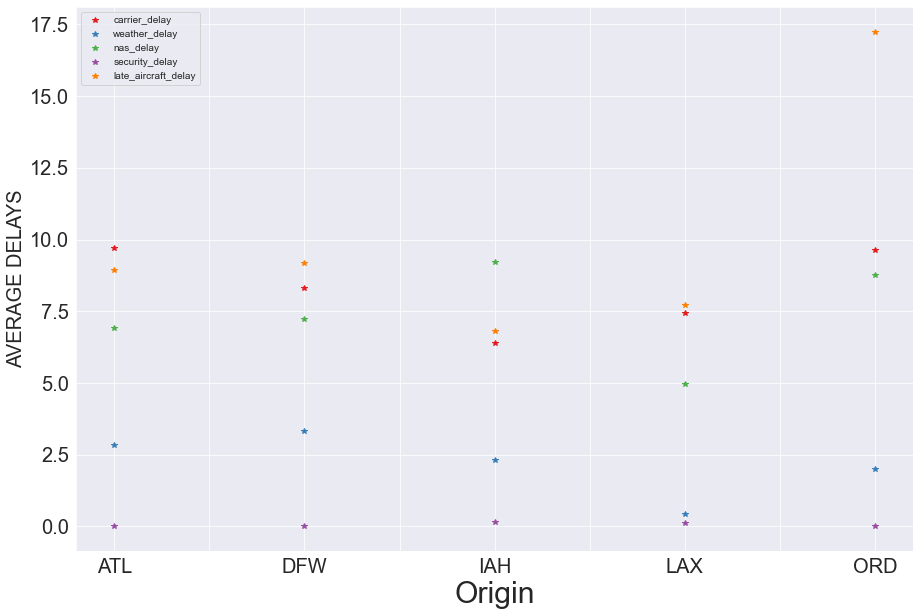

In [35]:
arrival_city_delay.plot(x = 'origin',figsize = [15,10], linestyle = '', marker = '*')
plt.legend()
plt.ylabel('AVERAGE DELAYS',fontsize=20)
plt.xticks(rotation=0,fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel('Origin', fontsize=30);

>  Hartsfield-Jackson Atlanta International(ATL) experienced more arrival delays as a result of a carrier delay, Dallas/Fort Worth International (DFW), Los Angeles International (LAX), and Chicago O'Hare International (ORD) experienced more delays from late aircraft. while IAH expericed more delay as a result of national air security delay

In [36]:
delay_sets = ['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']

def delay_trends(duration):
    '''  This function plots the trend of the duration passed in as arg  '''
    delay_df = []
    for delay in delay_sets:
        # looping dataframe creation
        df_delay = flights_df.query(f'{delay} > 0').groupby(duration)[delay].max().reset_index(name = delay)
        # merging created dataframes
        delay_df.append(df_delay)
   
    #plotting graphs
    df_merged = reduce(lambda left,right: pd.merge(left,right,on=[duration]), delay_df)
    plt.figure(figsize=(14,10))
    for delay in delay_sets:
        sns.lineplot(data=df_merged,x = duration, y=delay)
    plt.xlabel(duration, fontsize=18)
    plt.ylabel('Max Duration(mins)', fontsize=18)
    plt.xticks(ticks=[2004.0,2004.5,2005.0,2005.5,2006.0,2006.5,2007.0,2007.5,2008.0], labels=['2004','','2005','','2006','','2007',
                                            '','2008'])
    plt.legend(delay_sets)
    
    


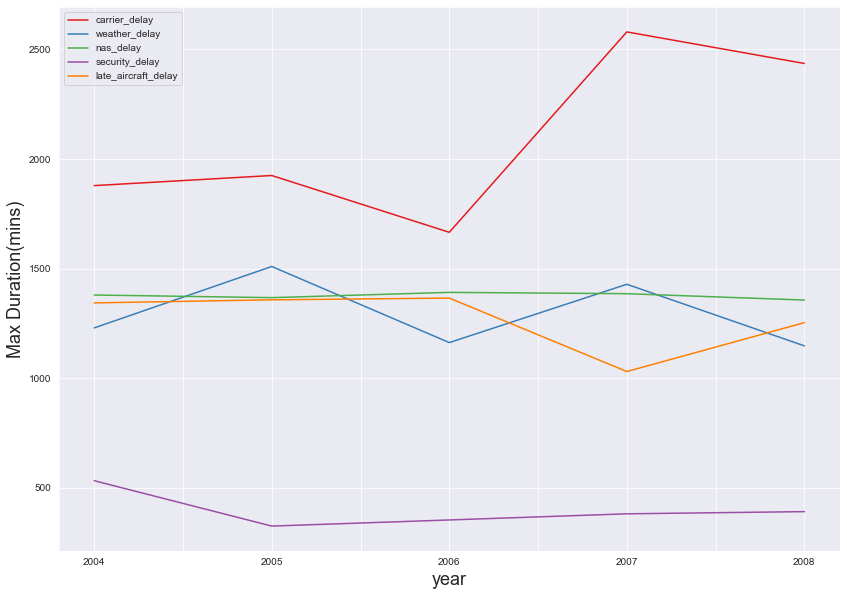

In [37]:
delay_trends('year')

> From the graph above, it can be seen that there are higher delay duration caused by carriers, with its peak at 2007, followed by the weather delay, which picked at 2005 a. Late aircraft delay and national air system delay tends to experience a close movement in their maximum duration trend althou late air craft delay  experience a gradual drop till 2007 while the was a gradual reverse in trend from 2007 .

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I investigated delays caused by origin and destination cities, and also the monthly trends of average delay over the period of study.  weather, carrier, and late flight are major influences on arrival and departure delays. 

### Were there any interesting or surprising interactions between features?

> The numeric features appeared to have given the plot and insights required to get major delay causes in various cities.

## Conclusions
> The Airline's on-time performance datasets as obtained from the extraction of 2004 to 2008 monthly data contain 31,254,220 records and 29 columns. The column names were adjusted for better readability and references. Most cancellation is due to the carrier, followed by weather, with security being the least of all cancellation causes, This means there have been very few instances of delays/cancellations due to security reasons. It's clearly visible  2007 had the most cancellation, followed by the year 2005, and the least period is the year 2008.

> In the **bivariate analysis section**, there appears to be a strong relationship of about 91% between arrival and departure delays. The other pairwise correlation between other features exhibits a weak positive or negative relationship, illustrated using a heatmap and scatter plot. 
**Multivariate analysis**, shows that higher delay duration are caused by carriers. Overall, It can be observed that OFD had the highest average late aircraft delay  and IAH had the highest national air system delay. Delays due to security reasons are the least common with less variation.

## Limitation

> Size of data set

## References

- stackoverflow.com
- Udacity example submission
- Weekly connect session example